In [ ]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    ax1.fill_between(gen, fit_mins, fit_maxs, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)

629.4660112857819


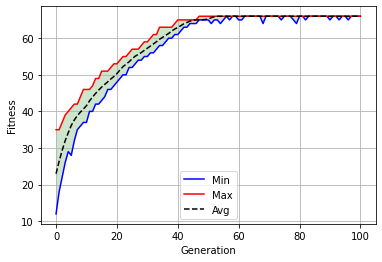

In [ ]:
t0 = time.time()

def area(punto):
    if punto[0] > 2000:
        return False
    if punto[1] > 2000:
        return False
    return True


def cobertura(interes, conexion):
    distancia = np.sqrt((interes[0]-conexion[0])**2 
                      + (interes[1]-conexion[1])**2)
    if distancia <= alcance:
        return True
    else:
        return False


def crea_individuo():
    individuo = [0]*numero*2
    for i in range(len(individuo)):
        individuo[i] = np.random.uniform(0, 2000)
    return individuo


def mutacion(individuo, indpb):
    for index, gen in enumerate(individuo):
        if random.random() < indpb: 
            individuo[index] = random.gauss(gen, 50)
            if individuo[index] < 0:
                individuo[index] = 0
            if individuo[index] > 2000:
                individuo[index] = 2000
    return individuo,


def fitness(individuo):
    x_pdc = individuo[0::2]
    y_pdc = individuo[1::2]
    pdi_vector = [0]*75
    for pdc in zip(x_pdc, y_pdc):
        if area(pdc) == False: 
            return penaliza,
        for index, pdi in enumerate(zip(x, y)):
            if pdi_vector[index] == 0: 
                if cobertura(pdi, pdc):
                    pdi_vector[index] = 1
    return sum(pdi_vector), 


def unico_objetivo_ga(NGEN, MU, CXPB, MUTPB, toolbox):

    LAMBDA = MU
    pop = toolbox.ini_poblacion(n = MU)
    hof = tools.HallOfFame(1, similar = np.array_equal)
 
    stats = tools.Statistics(key = lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
   
    logbook = tools.Logbook()
   
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, 
                    MU, LAMBDA, CXPB, MUTPB, NGEN,
                    stats= stats, halloffame=hof, verbose = False)
   
    return pop, hof, logbook


random.seed(1)

x = [random.uniform(0,2000) for _ in range(75)]
y = [random.uniform(0,2000) for _ in range(75)]

numero = 50
penaliza = -9e10
alcance = 100

creator.create("FitnessMin", base.Fitness, weights = (1.0,))
creator.create("Individual", list, fitness = creator.FitnessMin)
 
toolbox = base.Toolbox() 
toolbox.register("individual", tools.initIterate, creator.Individual, crea_individuo)
toolbox.register("ini_poblacion", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", mutacion, indpb = 0.05)
toolbox.register("select", tools.selTournament, tournsize = 3)

pop_new, pareto_new, log = unico_objetivo_ga(100, 300, 0.7, 0.3, toolbox)

t1 = time.time()
print(t1-t0)

plot_evolucion(log)

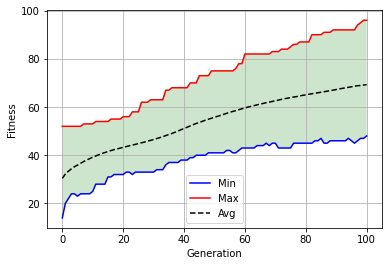

In [ ]:
def area(punto):
    """
    Función que recibe un punto de conexión y evalúa si se encuentra 
    dentro del área de estudio
    """
    if punto[0] > 2000:
        return False
    if punto[1] > 2000:
        return False
    return True


def cobertura(interes, conexion):
    """
    Función que recibe un punto de interés y uno de conexión y evalúa la 
    distancia entre ambos. Si la distancia es menor a 250 metros devuelve True, 
    en caso contrario False.
    """
    distancia = np.sqrt((interes[0]-conexion[0])**2 
                      + (interes[1]-conexion[1])**2)
    if distancia <= alcance:
        return True
    else:
        return False


def crea_individuo():
    individuo = [0]*numero*2
    for i in range(numero):
        p_pdi = random.randint(0, len(x) - 1)
        individuo[i] = x[p_pdi]
        individuo[i+numero] = y[p_pdi]
    return individuo


def mutacion(individuo, indpb):
    """
    Función que a partir de un individuo y una probabilidad de mutación 
    modifica los genes del mismo
    """
    #Para cada gen del individuo
    for index, gen in enumerate(individuo):
        if random.random() < indpb: 
            individuo[index] = random.gauss(gen, 50)
            if individuo[index] < 0:
                individuo[index] = 0
            if individuo[index] > 2000:
                individuo[index] = 2000
    return individuo,


def fitness(individuo):
    # Separamos los valores de x e y de los puntos de conexión
    x_pdc = individuo[0::2]
    y_pdc = individuo[1::2]
    # Vector para indicar qué puntos de interés están cubiertos
    pdi_vector = [0]*75
    pdi_vector_2 = [0]*75
    # Para cada punto de conexión (x_pdc,y_pdc)
    for pdc in zip(x_pdc, y_pdc):
        if area(pdc) == False: # Si están fuera del área, se descarta
            return penaliza,
        # Para cada punto de interés (x,y)
        for index, pdi in enumerate(zip(x, y)):
            if cobertura(pdi, pdc):
                pdi_vector[index] = 1
                pdi_vector_2[index] += 1
    
    return sum(pdi_vector), sum(pdi_vector_2) # Devolvemos el número de puntos cubiertos


def multiple_objetivo_ga(NGEN, MU, CXPB, MUTPB, toolbox):

    LAMBDA = MU
    pop = toolbox.ini_poblacion(n = MU)
    hof = tools.ParetoFront()
 
    stats = tools.Statistics(key = lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
   
    logbook = tools.Logbook()
   
    pop, logbook = algorithms.eaMuPlusLambda(
        pop, toolbox, 
        MU, LAMBDA, CXPB, MUTPB, NGEN,
        stats= stats, halloffame=hof, verbose = False
    )
   
    return pop, hof, logbook


# Con este comando conseguimos que siempre que se ejecute el script 
# se generen los mimos números aleatorios
random.seed(1)

# Generamos 75 coordenadas "x" e "y" para cada uno de los puntos
x = [random.uniform(0,2000) for _ in range(75)]
y = [random.uniform(0,2000) for _ in range(75)]

numero = 50
penaliza = -9e10
alcance = 100

creator.create("FitnessMin", base.Fitness, weights = (+1,+1))
creator.create("Individual", list, fitness = creator.FitnessMin)
 
toolbox = base.Toolbox() 
toolbox.register("individual", tools.initIterate, creator.Individual, crea_individuo)
toolbox.register("ini_poblacion", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxBlend, alpha = 0.5)
toolbox.register("mutate", mutacion, indpb = 0.05)
toolbox.register("select", tools.selNSGA2)

pop, pareto , log = multiple_objetivo_ga(100, 1000, 0.7, 0.3, toolbox)
with open("individuos_sensores_multi.txt", "a") as res_individuos:
    with open("fitness_sensores_multi.txt", "a") as res_fitness:
        for ide, ind in enumerate(pareto):
            res_individuos.write(str(ide))
            res_individuos.write(",")
            res_individuos.write(str(list(ind)))
            res_individuos.write("\n")
            res_fitness.write(str(ide))
            res_fitness.write(",")
            res_fitness.write(str(ind.fitness.values[0]))
            res_fitness.write(",")
            res_fitness.write(str(ind.fitness.values[1]))
            res_fitness.write("\n")

plot_evolucion(log)

In [ ]:
# para correr los algoritmos con multiprocesing
import multiprocessing
pool = multiprocessing.Pool(processes=4)
toolbox.register("map", pool.map)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=183a4102-ed36-4d8f-a68e-0f907c31c07b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>